In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My\ Drive/2017csb1072_Ass2/code

/content/drive/My Drive/2017csb1072_Ass2/code


In [0]:
rm ../results/*

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import img_as_float
from scipy.ndimage import convolve, gaussian_filter
from collections import deque

In [0]:
base_path = "../data/"
img_name = ["bicycle.bmp", "bird.bmp", "dog.bmp", "einstein.bmp", "plane.bmp", "toy_image.jpg"]
#best = [4, 4, 3, 5, 0, 1]

In [0]:
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = sobel_filter_x.T

In [0]:
def closest_dir(dirc):
    x = 22.5
    if (dirc >= -x and dirc < x) or (dirc >= 7*x and dirc < -7*x) :
        return (0, 1)
    elif (dirc >= x and dirc < 3*x) or (dirc >= -7*x and dirc < -5*x) :
        return (1, 1)
    elif (dirc >= 3*x and dirc < 5*x) or (dirc >= -5*x and dirc < -3*x):
        return (1, 0)
    else:
        return (1, -1)

0.03 0.2


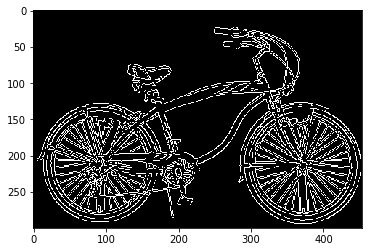

0.05 0.2


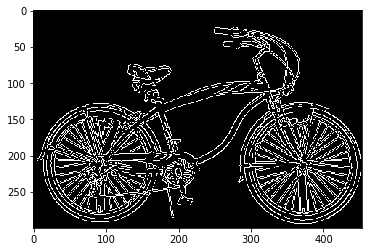

0.06999999999999999 0.2


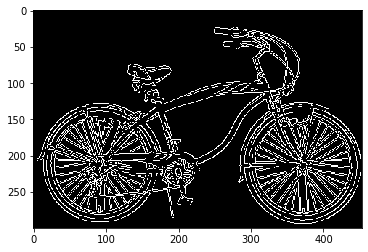

0.045 0.3


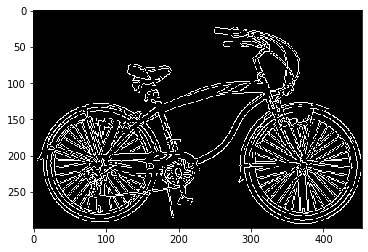

0.075 0.3


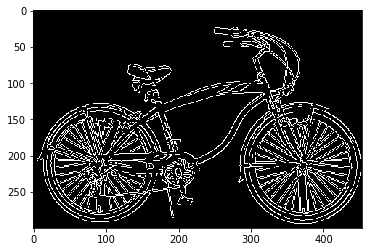

0.105 0.3


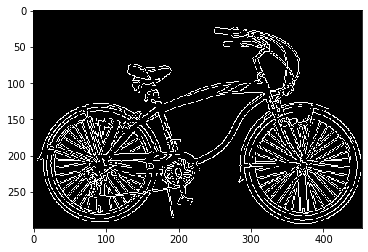

0.06 0.4


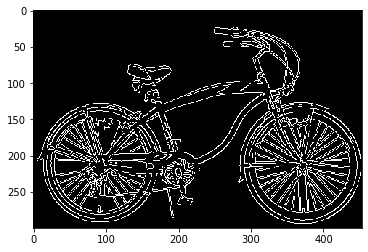

0.1 0.4


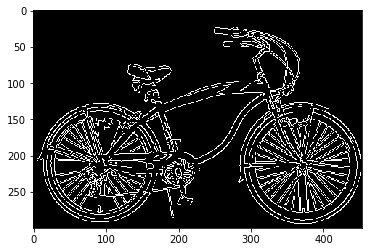

0.13999999999999999 0.4


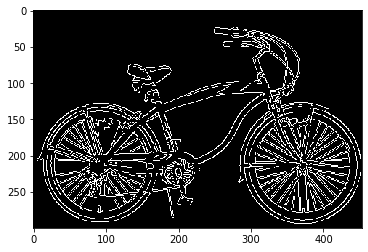

0.03 0.2


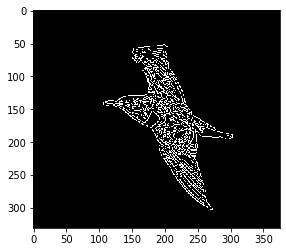

0.05 0.2


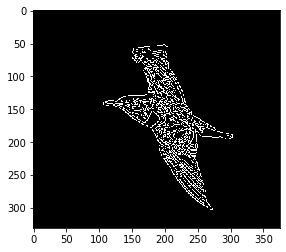

0.06999999999999999 0.2


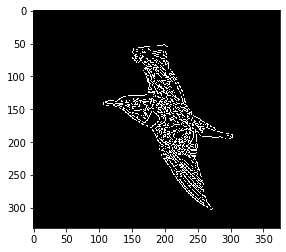

0.045 0.3


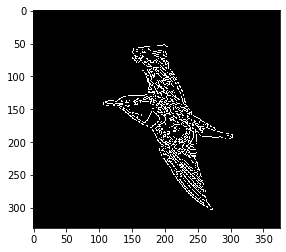

0.075 0.3


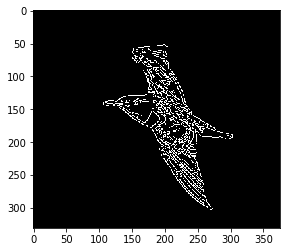

0.105 0.3


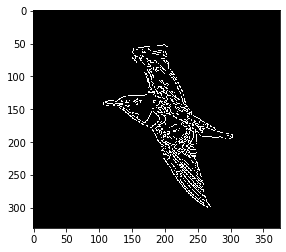

0.06 0.4


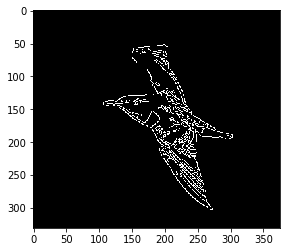

0.1 0.4


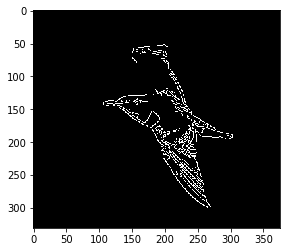

0.13999999999999999 0.4


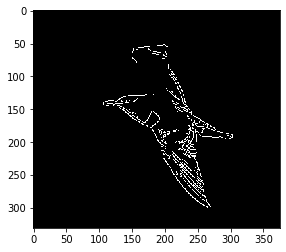

0.03 0.2


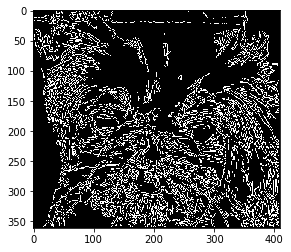

0.05 0.2


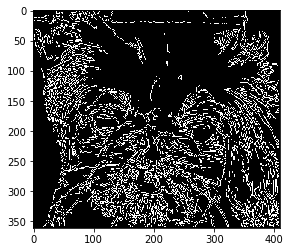

0.06999999999999999 0.2


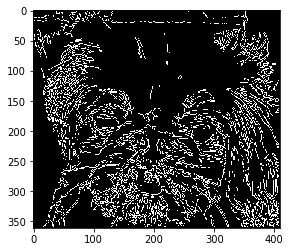

0.045 0.3


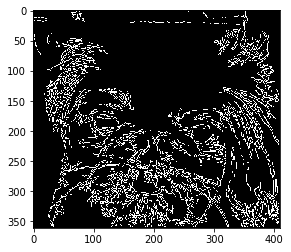

0.075 0.3


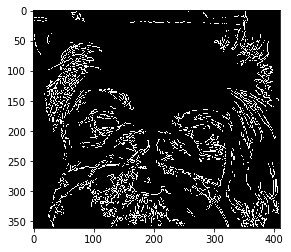

0.105 0.3


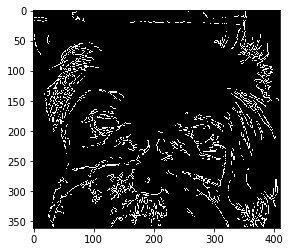

0.06 0.4


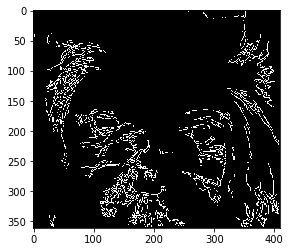

0.1 0.4


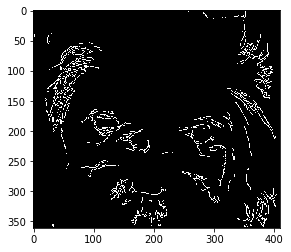

0.13999999999999999 0.4


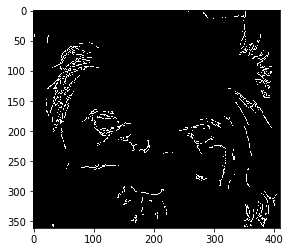

0.03 0.2


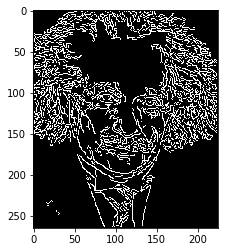

0.05 0.2


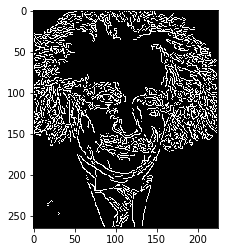

0.06999999999999999 0.2


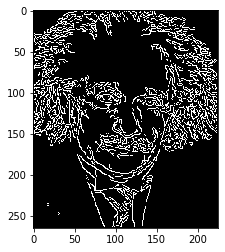

0.045 0.3


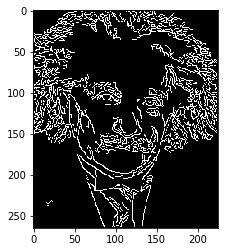

0.075 0.3


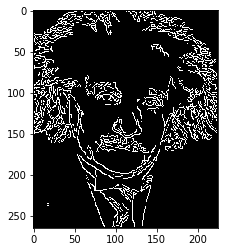

0.105 0.3


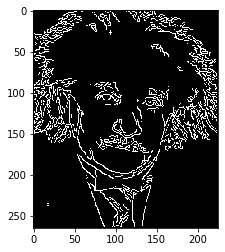

0.06 0.4


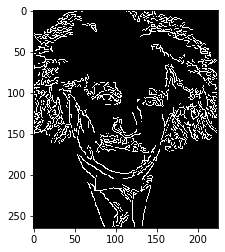

0.1 0.4


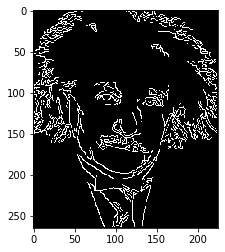

0.13999999999999999 0.4


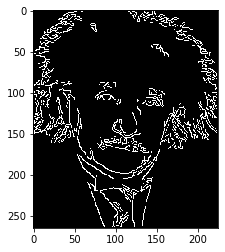

0.03 0.2


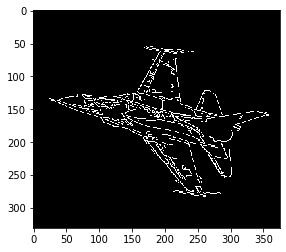

0.05 0.2


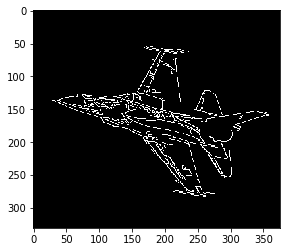

0.06999999999999999 0.2


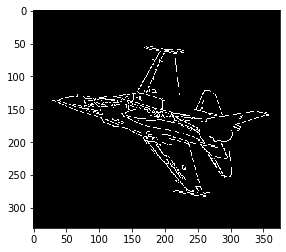

0.045 0.3


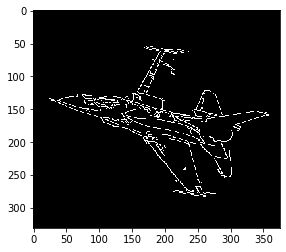

0.075 0.3


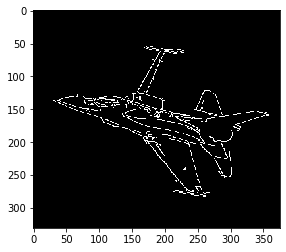

0.105 0.3


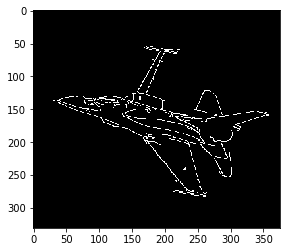

0.06 0.4


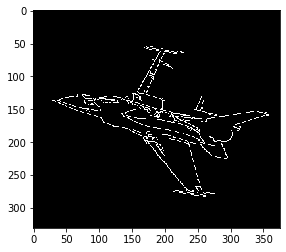

0.1 0.4


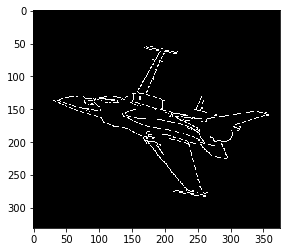

0.13999999999999999 0.4


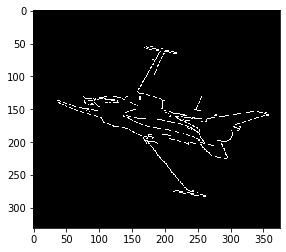

0.03 0.2


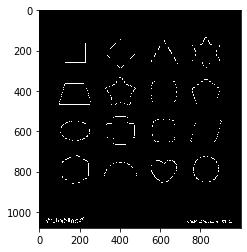

0.05 0.2


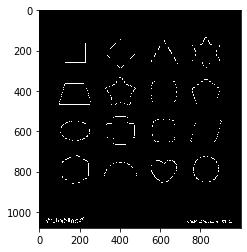

0.06999999999999999 0.2


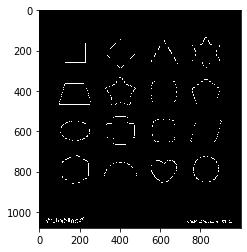

0.045 0.3


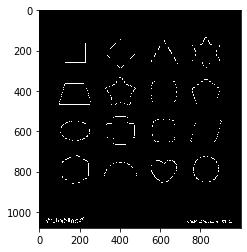

0.075 0.3


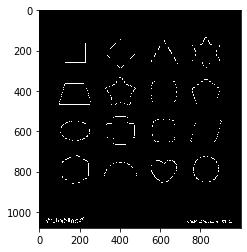

0.105 0.3


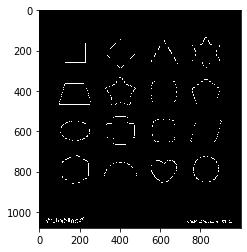

0.06 0.4


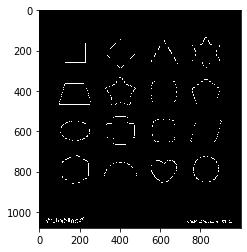

0.1 0.4


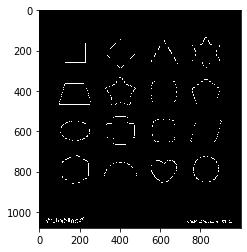

0.13999999999999999 0.4


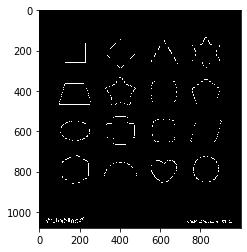

In [9]:
for img in img_name:
    #Reading the image
    test_img = img_as_float(mpimg.imread(base_path + img))
    test_img = 0.299 * test_img[:,:,0] + 0.587 * test_img[:,:,1] + 0.114 * test_img[:,:,2]
    test_img /= np.max(test_img)
    #Computing smoothed gradients
    fx_img = convolve(test_img, sobel_filter_x)
    fy_img = convolve(test_img, sobel_filter_y)
    grad_str = np.hypot(fx_img, fy_img)
    grad_dir = np.zeros(fy_img.shape)
    grad_str /= np.max(grad_str)
    grad_dir = np.degrees(np.arctan2(fy_img, fx_img))
    mpimg.imsave('../results/gradient_strength_' + img.split('.')[0] + '.jpg',grad_str, cmap='gray')
    mpimg.imsave('../results/gradient_direction_' + img.split('.')[0] + '.jpg',grad_dir, cmap='gray')

    #Non-maximal suppression       
    thin_img = np.zeros(test_img.shape)
    for i in range(1, thin_img.shape[0] - 1):
        for j in range(1, thin_img.shape[1] - 1):
            dx, dy = closest_dir(grad_dir[i][j])
            fhd, bhd = grad_str[i + dx][j + dy], grad_str[i - dx][j - dy]
            if grad_str[i][j] >= fhd and grad_str[i][j] >= bhd:
                thin_img[i][j] = grad_str[i][j]
    thin_img /= np.max(thin_img)
    mpimg.imsave('../results/thin_' + img.split('.')[0] + '.jpg',thin_img, cmap = 'gray')
    highThresholdRatio = [0.2, 0.3, 0.4]
    lowThresholdRatio = [0.15, 0.25, 0.35]
    for _i in range(len(highThresholdRatio)):
        for _j in range(len(lowThresholdRatio)):
            t_high = np.max(thin_img)*highThresholdRatio[_i]
            t_low = t_high * lowThresholdRatio[_j]
            hyst_img = np.zeros(thin_img.shape)
            for i in range(len(hyst_img)):
                for j in range(len(hyst_img[i])):
                    if thin_img[i][j] >= t_high:
                        hyst_img[i][j] = 1
                    elif thin_img[i][j] >= t_low:
                        hyst_img[i][j] = 0
                    else: hyst_img[i][j] = -1

            vis = np.zeros(thin_img.shape)
            for i in range(hyst_img.shape[0]):
                for j in range(hyst_img.shape[1]):
                    if hyst_img[i][j] == 1 and vis[i][j] == 0:
                        bfsq = deque()
                        bfsq.append((i, j))
                        while len(bfsq) > 0:
                            x, y = bfsq.popleft()
                            if vis[x][y] == 1: continue
                            vis[x][y] = 1
                            if hyst_img[x][y] < 0: continue
                            hyst_img[x][y] = 1
                            if x > 0: bfsq.append((x - 1, y))
                            if y > 0: bfsq.append((x , y - 1))
                            if x + 1 < hyst_img.shape[0]: bfsq.append((x + 1, y))
                            if y + 1 < hyst_img.shape[1]: bfsq.append((x, y + 1))
                            if x > 0 and y > 0: bfsq.append((x - 1, y - 1))
                            if x > 0 and y + 1 < hyst_img.shape[1]: bfsq.append((x - 1, y + 1))
                            if x + 1 < hyst_img.shape[0] and y > 0: bfsq.append((x + 1, y - 1))
                            if x + 1 < hyst_img.shape[0] and y + 1 < hyst_img.shape[1]: bfsq.append((x + 1, y + 1))

            fin_img = np.zeros(hyst_img.shape)
            for i in range(fin_img.shape[0]):
                for j in range(fin_img.shape[1]):
                    if hyst_img[i][j] == 1:
                        fin_img[i][j] = 1
            print(t_low, t_high)
            plt.imshow(fin_img, cmap='gray') 
            plt.imsave('../results/' + img.split('.')[0] + str(_i*3 + _j) + '.jpg', fin_img, cmap = 'gray')
            plt.show()